In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [37]:
df = pd.read_csv('C:\\Users\\LENOVO\\student1.csv')

In [38]:
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [39]:
X=df[['gmat','gpa','exp']]
X.head()

,gmat,gpa,exp
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [40]:
y=df.admitted
y.head()

0    1
1    1
2    0
3    1
4    0
Name: admitted, dtype: int64

In [41]:
df0=df[df.admitted==0]

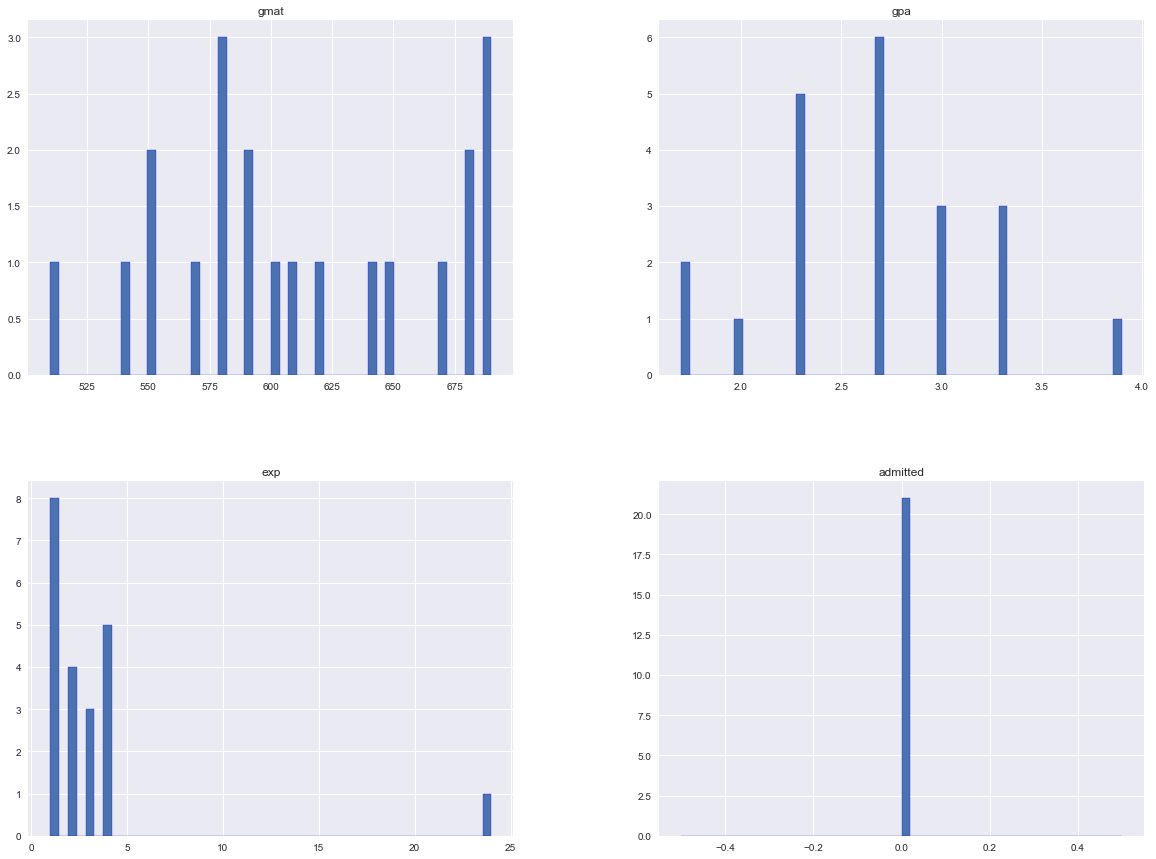

In [42]:
plt.style.use('seaborn')
df0.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [43]:
df1=df[df.admitted==1]

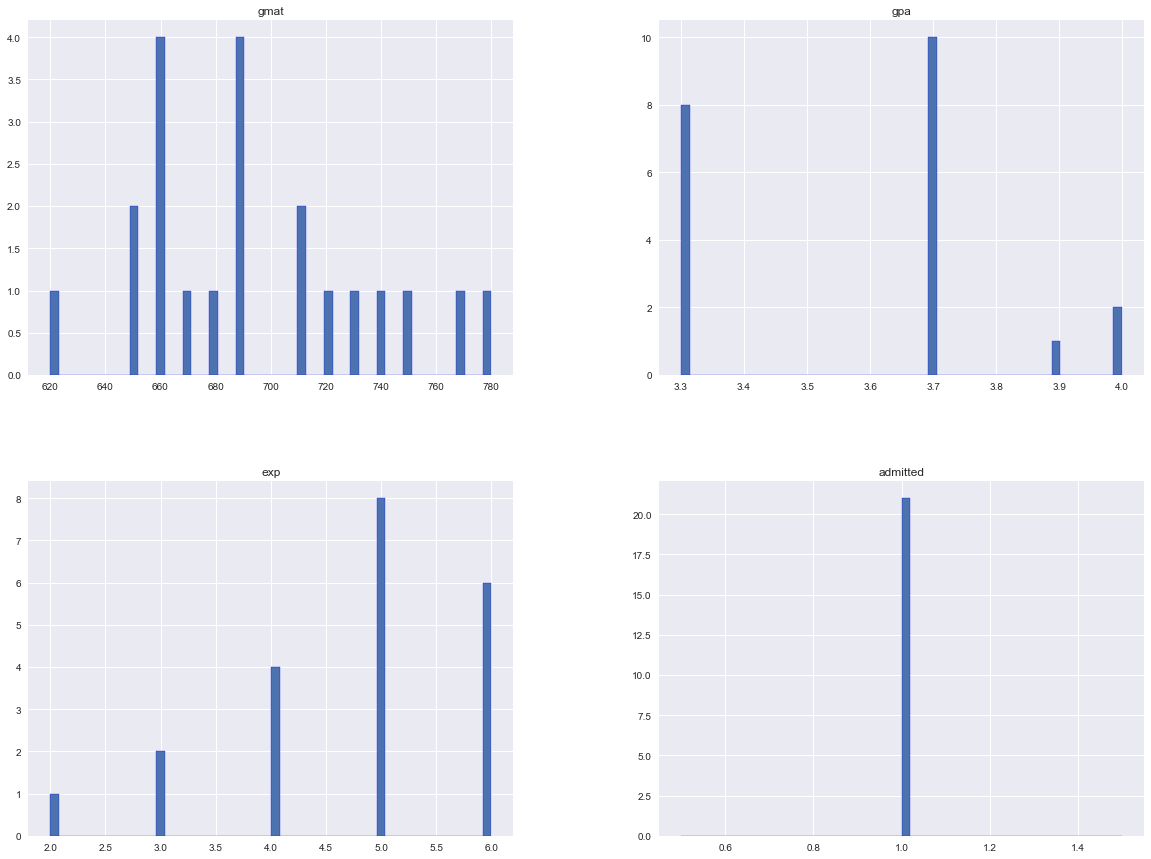

In [45]:
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model=DecisionTreeClassifier()

In [49]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
model.score(X_test,y_test)

0.7777777777777778

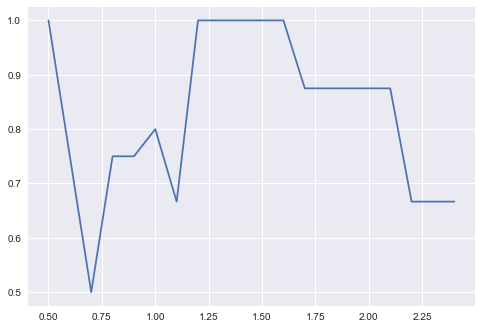

In [51]:
from sklearn.preprocessing import StandardScaler
score_list1 =[]
score_list2 =[]
df2=df.drop(['name','country'],axis=1)
def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.5,2.5,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby('exp'):
            m= np.mean(subdf.gmat)
            s=np.std(subdf.gmat)
            reduced_df =subdf[(subdf.gmat>(m-i*s))&(subdf.gmat<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    X=df4[['gmat','gpa','exp']]
    y=df4[['admitted']]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


In [52]:
df2

,gmat,gpa,exp,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [53]:
df2=df.drop(['name','country'],axis=1)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby('exp'):
        m= np.mean(subdf.gmat)
        s=np.std(subdf.gmat)
        reduced_df =subdf[(subdf.gmat>(m-1.5*s))&(subdf.gmat<(m+1.5*s))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out

In [54]:
df4 = remove_pps_outliers(df2)

In [55]:
X=df4[['gmat','gpa','exp']]
y=df4[['admitted']]

In [56]:
y

,admitted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
model.score(X_test,y_test)

1.0

In [60]:
y_pred=model.predict(X_test)

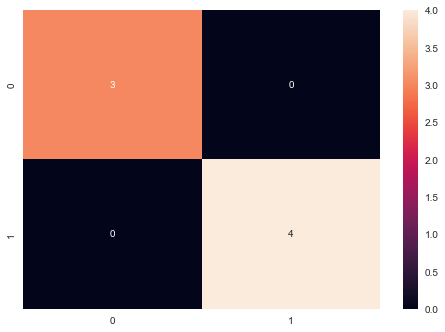

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True)
plt.show()

In [62]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



[Text(0.5714285714285714, 0.9166666666666666, 'X[1] <= 3.15\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.42857142857142855, 0.75, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7142857142857143, 0.75, 'X[2] <= 4.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(0.5714285714285714, 0.5833333333333334, 'X[0] <= 705.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.42857142857142855, 0.4166666666666667, 'X[0] <= 670.0\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.2857142857142857, 0.25, 'X[2] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7142857142857143, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8571428571428571, 0.5833333333333334, 'gini = 0.0\nsampl

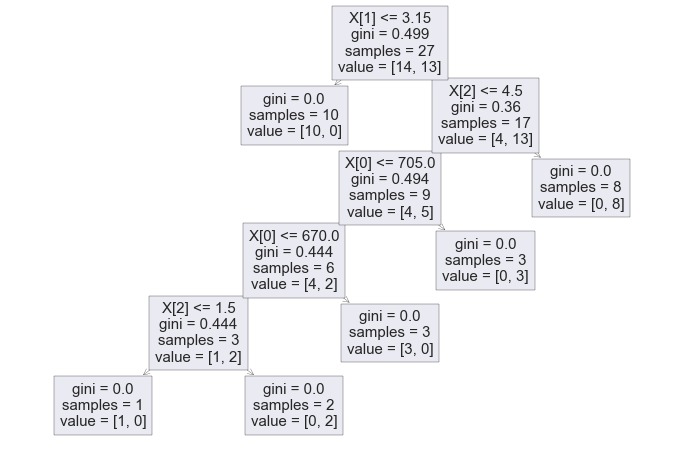

In [63]:
from sklearn import tree
plt.figure(figsize = (12,8))
tree.plot_tree(model.fit(X_train,y_train))

In [64]:
model=DecisionTreeClassifier(criterion='entropy')

In [65]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [66]:
model.score(X_test,y_test)

1.0

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model=RandomForestClassifier(n_estimators =10)

In [69]:
model.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11016\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [70]:
model.score(X_test,y_test)

1.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11016\3269017871.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11016\3269017871.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11016\3269017871.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11016\3269017871.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_tra

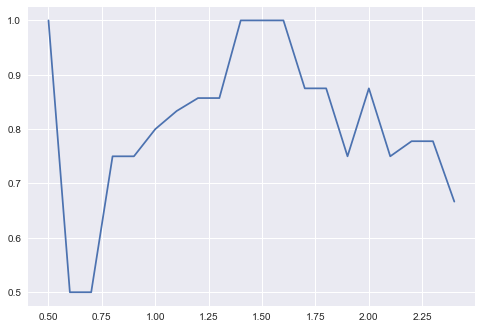

In [75]:
score_list1 =[]
score_list2 =[]
df2=df.drop(['name','country'],axis=1)

def range_with_floats(start,stop,step):
    while stop > start:
        yield start
        start += step
for i in range_with_floats(0.5,2.5,0.1):
    def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for keys,subdf in df.groupby('exp'):
            m= np.mean(subdf.gmat)
            s=np.std(subdf.gmat)
            reduced_df =subdf[(subdf.gmat>(m-i*s))&(subdf.gmat<(m+i*s))]
            df_out = pd.concat([df_out,reduced_df],ignore_index= True)
        return df_out
    df4 = remove_pps_outliers(df2)
    
    X=df4[['gmat','gpa','exp']]
    y=df4[['admitted']]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train,y_train)
    
    score_list1.append(i)
    
    score_list2.append(model.score(X_test,y_test))
                       
plt.plot(score_list1,score_list2)
plt.show()                   


In [76]:
model.feature_importances_

array([0.31586577, 0.18823832, 0.49589592])